In [2]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
import numpy as np
import pandas as pd
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import AxesGrid
# import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cartopy.io.shapereader as shpreader
import matplotlib.colors as colors
from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords)

In [3]:
import matplotlib.colors as colors

In [4]:
igbpPalette = ['#228B22', '#228B22', '#228B22', '#228B22', '#228B22', 
                '#ADFF2F','#ADFF2F', '#556B2F', '#556B2F', '#7CFC00', 
                '#BDB76B', '#FFD700', '#A52A2A', '#808000', '#ADD8E6', 
               '#A0522D', '#4682B4','#778899','#778899','#778899']

In [5]:
cmaps = colors.ListedColormap(igbpPalette)

In [6]:
ncfile = Dataset("/mnt/e/wrf_tibet/test/tibet/wrfinput_d01")

In [7]:
ncfile

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    TITLE:  OUTPUT FROM REAL_EM V4.2.1 PREPROCESSOR
    START_DATE: 2018-01-01_12:00:00
    SIMULATION_START_DATE: 2018-01-01_12:00:00
    WEST-EAST_GRID_DIMENSION: 232
    SOUTH-NORTH_GRID_DIMENSION: 172
    BOTTOM-TOP_GRID_DIMENSION: 33
    DX: 30000.0
    DY: 30000.0
    AERCU_OPT: 0
    AERCU_FCT: 1.0
    IDEAL_CASE: 0
    DIFF_6TH_SLOPEOPT: 0
    AUTO_LEVELS_OPT: 2
    DIFF_6TH_THRESH: 0.1
    DZBOT: 50.0
    DZSTRETCH_S: 1.3
    DZSTRETCH_U: 1.1
    GRIDTYPE: C
    DIFF_OPT: 1
    KM_OPT: 4
    DAMP_OPT: 3
    DAMPCOEF: 0.2
    KHDIF: 0.0
    KVDIF: 0.0
    MP_PHYSICS: 8
    RA_LW_PHYSICS: 4
    RA_SW_PHYSICS: 4
    SF_SFCLAY_PHYSICS: 2
    SF_SURFACE_PHYSICS: 2
    BL_PBL_PHYSICS: 2
    CU_PHYSICS: 6
    SF_LAKE_PHYSICS: 0
    SURFACE_INPUT_SOURCE: 3
    SST_UPDATE: 0
    GRID_FDDA: 0
    GFDDA_INTERVAL_M: 0
    GFDDA_END_H: 0
    GRID_SFDDA: 0
    SGFDDA_INTERVAL_M: 0
    SGFDD

In [12]:
rm_grass=Dataset('/mnt/e/wrf_tibet/test/2000.01/rm_grass/control')

In [ ]:
Land Use Category Land Use Description
1 Evergreen Needleleaf Forest
2 Evergreen Broadleaf Forest
3 Deciduous Needleleaf Forest
4 Deciduous Broadleaf Forest
5 Mixed Forests
6 Closed Shrublands
7 Open Shrublands
8 Woody Savannas
9 Savannas
10 Grasslands
11 Permanent Wetlands
12 Croplands
13 Urban and Built-Up
14 Cropland/Natural Vegetation Mosaic
15 Snow and Ice
16 Barren or Sparsely Vegetated
17 Water
18 Wooded Tundra
19 Mixed Tundra
20 Barren Tundra

In [13]:
ncfile

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    TITLE:  OUTPUT FROM REAL_EM V4.2.1 PREPROCESSOR
    START_DATE: 2018-01-01_12:00:00
    SIMULATION_START_DATE: 2018-01-01_12:00:00
    WEST-EAST_GRID_DIMENSION: 232
    SOUTH-NORTH_GRID_DIMENSION: 172
    BOTTOM-TOP_GRID_DIMENSION: 33
    DX: 30000.0
    DY: 30000.0
    AERCU_OPT: 0
    AERCU_FCT: 1.0
    IDEAL_CASE: 0
    DIFF_6TH_SLOPEOPT: 0
    AUTO_LEVELS_OPT: 2
    DIFF_6TH_THRESH: 0.1
    DZBOT: 50.0
    DZSTRETCH_S: 1.3
    DZSTRETCH_U: 1.1
    GRIDTYPE: C
    DIFF_OPT: 1
    KM_OPT: 4
    DAMP_OPT: 3
    DAMPCOEF: 0.2
    KHDIF: 0.0
    KVDIF: 0.0
    MP_PHYSICS: 8
    RA_LW_PHYSICS: 4
    RA_SW_PHYSICS: 4
    SF_SFCLAY_PHYSICS: 2
    SF_SURFACE_PHYSICS: 2
    BL_PBL_PHYSICS: 2
    CU_PHYSICS: 6
    SF_LAKE_PHYSICS: 0
    SURFACE_INPUT_SOURCE: 3
    SST_UPDATE: 0
    GRID_FDDA: 0
    GFDDA_INTERVAL_M: 0
    GFDDA_END_H: 0
    GRID_SFDDA: 0
    SGFDDA_INTERVAL_M: 0
    SGFDD

In [32]:
slp = getvar(rm_grass, "HGT")
smooth_slp = smooth2d(slp, 3, cenweight=4)

# Get the latitude and longitude points
lats, lons = latlon_coords(slp)

# Get the cartopy mapping object
cart_proj = get_cartopy(slp)

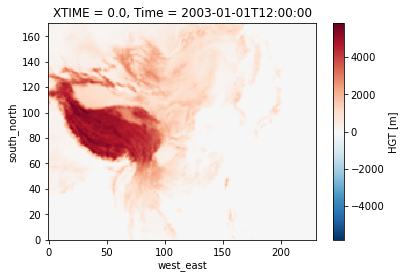

In [33]:
slp.plot()

In [16]:
#mymap=

In [27]:
slp

<xarray.DataArray 'LU_INDEX' (south_north: 171, west_east: 231)>
array([[17., 17., 17., ..., 17., 17., 17.],
       [17., 17., 17., ..., 17., 17., 17.],
       [17., 17., 17., ..., 17., 17., 17.],
       ...,
       [10., 10., 10., ..., 17., 17., 17.],
       [10., 10., 10., ..., 17., 17., 17.],
       [10., 10., 10., ..., 17., 17., 17.]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 82.610504 82.83075 ... 161.61536
    XLAT     (south_north, west_east) float32 8.361839 8.439087 ... 48.142765
    XTIME    float32 0.0
    Time     datetime64[ns] 2003-01-01T12:00:00
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  LAND USE CATEGORY
    units:        
    stagger:      
    coordinates:  XLONG XLAT XTIME
    projection:   LambertConformal(stand_lon=110.0, moad_cen_lat=35.180019378...

In [60]:
mycolor = colors.LinearSegmentedColormap.from_list('mycmap', [ 'white','Green','OliveDrab','SaddleBrown'])

In [71]:
colors_undersea = plt.cm.terrain(np.linspace(0, 0.17, 1))
colors_land = plt.cm.terrain(np.linspace(0.25, 1, 256))
all_colors = np.vstack(( colors_land))
terrain_map = colors.LinearSegmentedColormap.from_list('terrain_map',
    all_colors)

<ipython-input-82-fcc7a2cc7c8c>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.linspace(-150,-50, 3),fontsize=16)


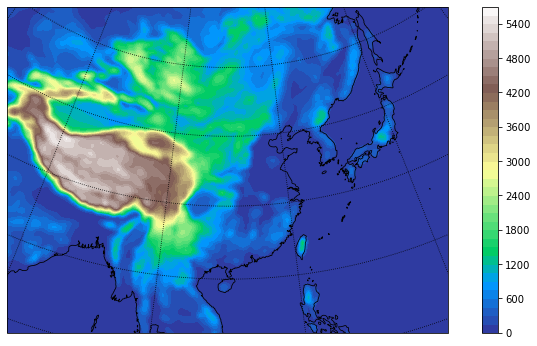

In [82]:



fig = plt.figure(figsize=(12,6))
# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)

# Download and add the states and coastlines
states = NaturalEarthFeature(category="cultural", scale="50m",
                             facecolor="none",
                             name="admin_1_states_provinces_shp")
ax.add_feature(states, linewidth=.5, edgecolor="black")
ax.coastlines('50m', linewidth=0.8)
#ax.set_xticks(np.linspace(-150,-50, 3), crs=ccrs.cart_proj())
#ax.set_xticklabels(np.linspace(-150,-50, 3),fontsize=16)

#Make the contour outlines and filled contours for the smoothed sea level
# pressure.
#plt.contour(to_np(lons), to_np(lats), to_np(smooth_slp), 10, colors="black",
#            transform=crs.PlateCarree())
plt.contourf(to_np(lons), to_np(lats), to_np(smooth_slp), 50,
             transform=crs.PlateCarree(),
             cmap=get_cmap("terrain")
#             cmap=terrain_map
            )

# Add a color bar
plt.colorbar(ax=ax)

# Set the map bounds
ax.set_xlim(cartopy_xlim(smooth_slp))
ax.set_ylim(cartopy_ylim(smooth_slp))

# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")

#plt.title("Sea Level Pressure (hPa)")


#plt.savefig('/mnt/e/wrf_tibet/figure/domain.jpg',bbox_inches='tight',dpi=300)
plt.show()